In [1]:
import pcl
import pcl.pcl_visualization
import time
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#cloud = pcl.PointCloud(300000)
n = 335
rgb_name = '/home/arno/SSC/data_unreal/pointcloud_save/rgb_' +str(n) + '.pickle'
filename = '/home/arno/SSC/data_unreal/pointcloud_save/pc_'+str(n) + '.pickle'
camera_file = '/home/arno/SSC/data_unreal/pointcloud_save/camera_angles_'+str(n) + '.pickle'
with open(filename, 'rb') as f:
    pc = pickle.load(f)
with open(rgb_name, 'rb') as f:
    rgb = pickle.load(f)
with open(camera_file, 'rb') as f:
    camera_angles = pickle.load(f)
    
points=np.zeros((pc.shape[0],3))
points[:,0]=pc['x']
points[:,1]=pc['y']
points[:,2]=pc['z']
cloud = pcl.PointCloud(np.array(points, dtype=np.float32))


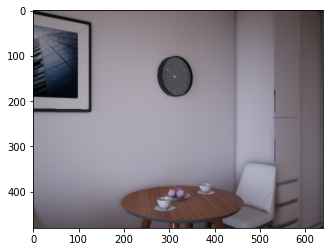

In [3]:
plt.imshow(rgb)

In [7]:
s = time.clock()
sor = cloud.make_voxel_grid_filter()
sor.set_leaf_size(0.025, 0.025, 0.025)
cloud_filtered = sor.filter()
cloud_filtered_np = cloud_filtered.to_array()
print(cloud_filtered_np.shape)

# filter end round part of PC 
cloud_filtered_np = cloud_filtered_np[np.sqrt(cloud_filtered_np[:,0]**2 + cloud_filtered_np[:,1]**2 + cloud_filtered_np[:,2]**2) < 5.9]
print(cloud_filtered_np.shape)
cloud_filtered = pcl.PointCloud(cloud_filtered_np)


# compute normals
ne = cloud_filtered.make_NormalEstimation()
ne.set_RadiusSearch(0.10)
normals = ne.compute()

normals_np = normals.to_array()
normals_no_curvature = normals_np[normals_np[:,-1] < 0.001]
print(normals_no_curvature.shape)

# keep only horizontal normals
normals_horizontal = normals_no_curvature[np.abs(normals_no_curvature[:,1])<0.01][:,:3]

# make normal point towards surface
normals_horizontal[:,2] = np.abs(normals_horizontal[:,2]) 

horizontal_angles = np.tan(normals_horizontal[:,0]/normals_horizontal[:,2])
# round angles and evaluate most presents
horizontal_angles = np.round(horizontal_angles,2)
values, counts = np.unique(horizontal_angles,return_counts=True,axis=0)
id_most_present = np.flip(np.argsort(counts))[:8]
wall_normal_angles = values[id_most_present]
print(wall_normal_angles)
print(wall_normal_angles/np.pi*180,counts[id_most_present][:8])
print(normals_horizontal.shape)

print(time.clock()-s)

(17993, 3)
(17993, 3)
(11948, 4)
[ 1.06  1.07  1.05 -2.78 -2.77 -2.79 -2.76 -2.75]
[  60.73352    61.306484   60.160564 -159.28226  -158.7093   -159.85521
 -158.13635  -157.56339 ] [5547 3946  416  161  144  141  126  109]
(11166, 3)
0.12246400000000035


In [6]:
cloud_filtered_np.shape

(17993, 3)

In [14]:
ids_my_normals = (normals_np[:,-1] < 0.001)*(np.abs(normals_np[:,1])<0.01)

In [15]:
my_cloud = pcl.PointCloud(cloud_filtered_np[ids_my_normals])
print(my_cloud)
# compute normals
ne = my_cloud.make_NormalEstimation()
ne.set_RadiusSearch(0.10)
my_normals = ne.compute()

<PointCloud of 16689 points>


In [16]:
my_normals_np = my_normals.to_array()
my_normals_np[:,2] = np.abs(my_normals_np[:,2]) # make normal point towards surface 


In [17]:
viewer = pcl.pcl_visualization.PCLVisualizering()
viewer.SetBackgroundColor (0.0, 0.0, 0.5)
viewer.AddPointCloudNormals(my_cloud, my_normals,scale = 0.3)
#viewer.AddPointCloud(my_cloud)

flag = True
viewer.Spin()
viewer.Close()


# Find voxel grid origin

In [ ]:
camera_to_aligned_camera = np.array([[ 0.93968901,  0.,         -0.34203006,  0.        ],
                                     [ 0.      ,    1. ,         0.,          0.        ],
                                     [ 0.34203006 , 0. ,         0.93968901,  0.        ],
                                     [ 0.        ,  0.  ,        0.,          1.        ]])
camera_to_aligned_camera = camera_to_aligned_camera[:3,:3]
camera_to_aligned_camera

In [ ]:
s = time.clock()
# find extreme pointcl0ud values in aligned camera frame 
cloud_filtered_aligned = np.array([np.matmul(np.linalg.inv(camera_to_aligned_camera),point) for point in cloud_filtered_np])
print(time.clock()-s)
cloud_filtered_aligned
max_aligned = np.max(cloud_filtered_aligned,axis=0)
min_aligned = np.min(cloud_filtered_aligned,axis=0)
max_original = np.max(cloud_filtered_np,axis=0)
min_original =  np.min(cloud_filtered_np,axis=0)
print(min_original, max_original)
print(min_aligned, max_aligned)

In [ ]:
#convert extreme values back to camera frame 
max_ = camera_to_aligned_camera@max_aligned
min_ = camera_to_aligned_camera@min_aligned
print(min_,max_)

In [ ]:
angle = 35/180*np.pi
my_angle_degree = angle/np.pi*180 % 90
my_angle_degr

In [ ]:
0.34/np.pi*180

# Old stuff


In [ ]:
s = time.clock()
# estimate normals
print ('make_IntegralImageNormalEstimation: ')
ne = cloud.make_IntegralImageNormalEstimation()

print ('set_NormalEstimation_Method_AVERAGE_3D_GRADIENT: ')
ne.set_NormalEstimation_Method_AVERAGE_3D_GRADIENT ()
print ('set_MaxDepthChange_Factor: ')
#ne.set_MaxDepthChange_Factor(0.02)
print ('set_NormalSmoothingSize: ')
ne.set_NormalSmoothingSize(10.0)
print ('set OK')
print ('compute2 - start')
normals = ne.compute()
print(time.clock()-s)
normals

In [ ]:
class_names = dict([(name, cls) for name, cls in pcl.__dict__.items() if isinstance(cls, type)])
for name, cls in class_names.items():
    print(name)

In [ ]:
from scipy.spatial.transform import Rotation as R

In [ ]:
m = np.identity(4)

In [ ]:
m = R.from_matrix(m[:3,:3])
m.as_euler('xyz', degrees=True)

In [ ]:
def recenter_angle(angle, range = [-np.pi,np.pi]): 
    while (angle>range[1] or angle < range[0]):
        if angle < range[0]: angle+=2*np.pi
        if angle > range[1]: angle-=2*np.pi
    return angle 

In [ ]:
recenter_angle(-np.pi-0.01)

In [ ]:
np.pi